# > OBJECTIVES

#### _Database setup, Data Import, Data Exploration, Temporal Analysis, Spatial Analysis, Victim Demographics, Status Analysis_

# > IMPORTING LIBRARIES

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# > DATABASE SETUP

In [2]:
connection = pymysql.connect(host ='localhost',
                            user ='root',
                            password ='Mysql@2024',
                            database ='capstone_project')            #connection details..

In [4]:
cursor = connection.cursor()                                         #cursor() to execute queries ..                     

In [5]:
cursor.execute('Select * from crime_data')
rows = cursor.fetchall()

print(rows)                                                          #verifying the connection by importing..

((10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3), (190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25), (191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4), (191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'Unidentified', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45), (200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26), (200100507, '01-04-2020', '01-04-2020', 'Central', 341, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 23, 

# > DATA EXPLORATION

In [6]:
crime_data = pd.read_sql_query("select * from crime_data", connection)
crime_data.head()                                                           #checking the data..

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,Unidentified,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


#  _BASIC STATISTICS OF THE DATASET_

In [7]:
crime_data.shape                                                 #count of rows and cols..

(409, 13)

In [8]:
basic_statistics = crime_data.describe()                         #describe() gives statistical measures..

In [9]:
basic_statistics

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.090000e+02,409.000000,409.000000,409.000000,409.000000
mean,1.999092e+08,495.239609,39.215159,34.049633,-118.261491
std,9.640681e+06,199.561704,14.836120,0.045613,0.041165
min,1.030447e+07,210.000000,8.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,27.000000,34.040000,-118.260000
50%,2.001048e+08,440.000000,35.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,51.000000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [10]:
crime_data['Crm_Cd'].unique()                                         #fetched unique values..

array([624, 745, 740, 442, 341, 330, 930, 354, 230, 761, 350, 310, 480,
       440, 900, 210, 888, 886, 420, 421, 946, 647, 940, 662, 220, 625,
       755, 901, 351, 820, 648, 812, 320, 623, 920, 850, 666, 956, 343],
      dtype=int64)

In [11]:
crime_data['AREA_NAME'].unique()                                     #fetched unique values..

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Van Nuys',
       'Wilshire', 'Rampart', 'Pacific', 'Hollenbeck', 'West LA',
       'Northeast', 'Foothill', 'West Valley', 'Hollywood', 'Harbor',
       '77th Street', 'Olympic', 'Devonshire', 'Southeast'], dtype=object)

#  _DISTINCT CRIME CODES AND THEIR DESCRIPTIONS_

In [12]:

distinct_crime_info = crime_data[['Crm_Cd', 'Crm_Cd_Desc']].drop_duplicates()


In [13]:
distinct_crime_info                                              #extracted data using pandas func. by dropping duplicates..

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
10,354,THEFT OF IDENTITY
12,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
15,761,BRANDISH WEAPON


# > TEMPORAL ANALYSIS

In [14]:
crime_data['DATE_OCC'].describe()                                 #describe() - statistical measures..

count            409
unique            54
top       01-11-2020
freq              35
Name: DATE_OCC, dtype: object

In [15]:
crime_data['Date_Rptd'].describe()                               #describe() - statistical measures..

count            409
unique            58
top       01-11-2020
freq              36
Name: Date_Rptd, dtype: object

#  _TRENDS IN CRIME OCCURRENCES OVER TIME_

In [132]:
Dates = pd.read_sql_query("SELECT Date_Rptd, COUNT(*) AS Crime_Count FROM crime_data WHERE Date_Rptd IS NOT NULL GROUP BY Date_Rptd ORDER BY Crime_Count DESC LIMIT 30", connection)

In [133]:
Dates                                     #extracted date using sql inside pandas func..

,Date_Rptd,Crime_Count
0,01-11-2020,36
1,01-12-2020,30
2,02-02-2020,27
3,01-02-2020,26
4,01-08-2020,23
5,01-06-2020,23
6,02-03-2020,23
7,01-05-2020,21
8,02-05-2020,19
9,01-04-2020,18


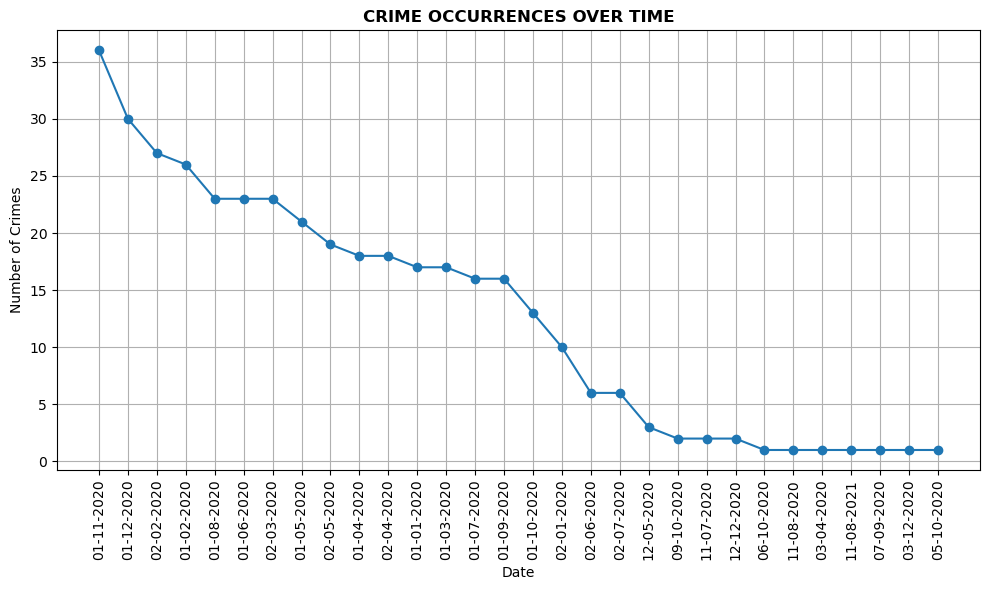

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(Dates['Date_Rptd'], Dates['Crime_Count'], marker='o', linestyle='-')
plt.title('CRIME OCCURRENCES OVER TIME', weight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# > SPATIAL ANALYSIS

##  _GEOGRAPHICAL HOTSPOTS FOR REPORTED CRIMES_

In [24]:
hotspots_data = pd.read_sql_query("select AREA_NAME,Location,LAT,LON from crime_data", connection)

In [25]:
hotspots_data                                   #obtained the data with sql & pandas..

,AREA_NAME,Location,LAT,LON
0,Southwest,1100 W 39TH PL,34.01,-118.30
1,Central,700 S HILL ST,34.05,-118.25
2,N Hollywood,5400 CORTEEN PL,34.17,-118.40
3,Mission,14400 TITUS ST,34.22,-118.45
4,Central,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...
404,Central,600 EXPOSITION BL,34.04,-118.24
405,Central,2400 ELLENDALE PL,34.05,-118.26
406,Central,39TH PL,34.05,-118.26
407,Central,2500 W VERNON AV,34.05,-118.25


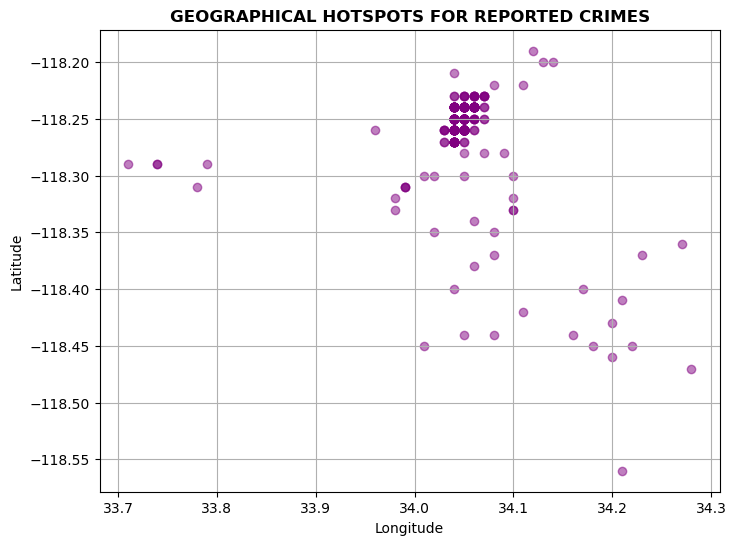

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(hotspots_data['LAT'], hotspots_data['LON'], alpha = 0.5, marker ='o', color='purple')
plt.title('GEOGRAPHICAL HOTSPOTS FOR REPORTED CRIMES', weight = 'bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

##  _PREMISES DESCRIPTION WHERE CRIMES OCCUR_

In [135]:
Crime_Premises = pd.read_sql_query("SELECT Premis_Desc, COUNT(*) AS Crime_Count FROM crime_data WHERE Premis_Desc IS NOT NULL GROUP BY Premis_Desc ORDER BY Crime_Count DESC LIMIT 20", connection)

In [136]:
Crime_Premises                                             #extracted the top 20 data by using sql query inside pd func...

,Premis_Desc,Crime_Count
0,STREET,72
1,SIDEWALK,60
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",44
3,PARKING LOT,35
4,SINGLE FAMILY DWELLING,25
5,"VEHICLE, PASSENGER/TRUCK",19
6,OTHER BUSINESS,15
7,OTHER STORE,13
8,DEPARTMENT STORE,10
9,RESTAURANT/FAST FOOD,10


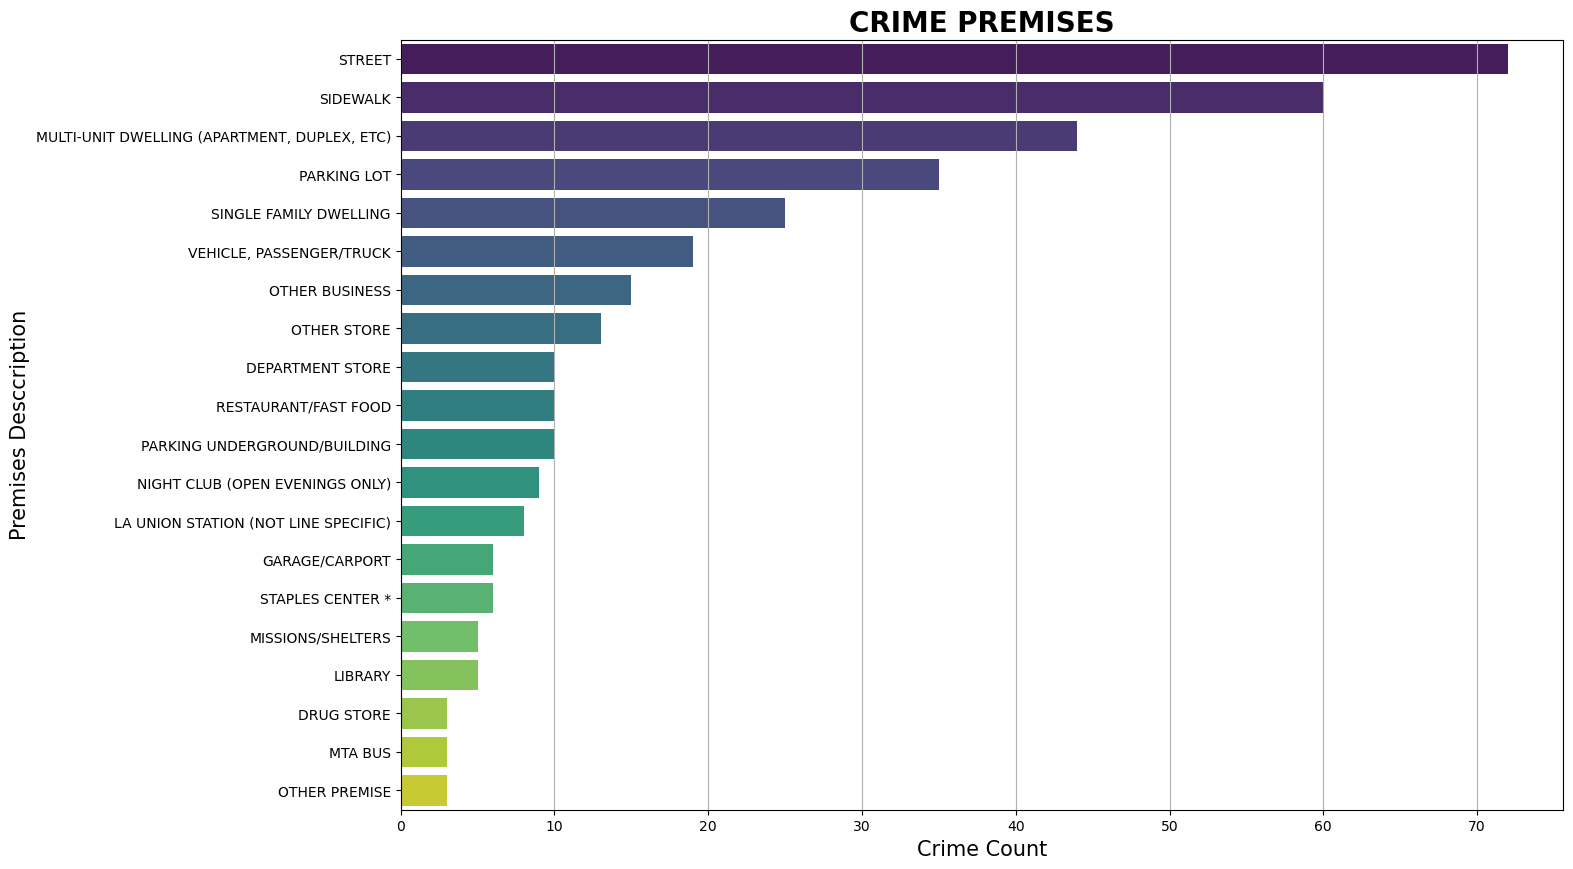

In [137]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Crime_Count', y='Premis_Desc', data=Crime_Premises, palette='viridis')

plt.title('CRIME PREMISES',size = 20, weight= 'bold')
plt.xlabel('Crime Count', size =15)
plt.ylabel('Premises Desccription', size =15)
plt.grid(axis='x')
plt.show()

##  _THE STATUS OF REPORTED CRIMES_


In [46]:
crm_status = pd.read_sql_query("SELECT Status, COUNT(*) AS status_count FROM crime_data GROUP BY Status ORDER BY status_count DESC",connection)

In [47]:
crm_status                                          #got the status and their counts as per the data..

,Status,status_count
0,IC,367
1,AO,22
2,AA,19
3,JO,1


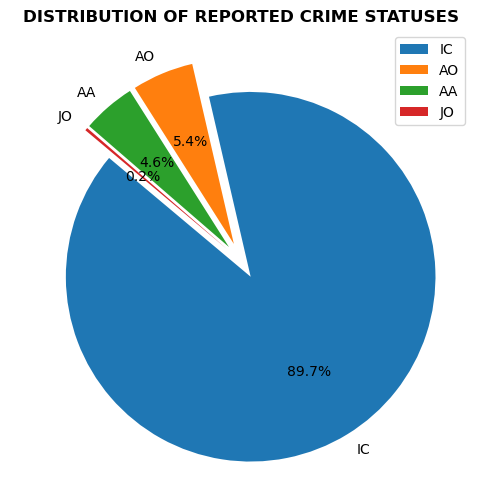

In [121]:
plt.figure(figsize=(8, 6))
exp = [0.1,0.1,0.1,0.1]
plt.pie(crm_status['status_count'],explode=exp, labels = crm_status['Status'], autopct='%1.1f%%', startangle=140)
plt.title('DISTRIBUTION OF REPORTED CRIME STATUSES', weight ='bold')
plt.legend()
plt.show()

#  _CRIME BASED ON THEIR STATUS_

In [50]:
crm_cr_status =pd.read_sql_query("SELECT Crm_Cd, Crm_Cd_Desc, Status, COUNT(*) AS occurrences FROM crime_data GROUP BY Crm_Cd, Crm_Cd_Desc, Status ORDER BY occurrences DESC", connection)

In [51]:
crm_cr_status                                  #observing the occurences with crime cd & desc on the basis of their statuses..

,Crm_Cd,Crm_Cd_Desc,Status,occurrences
0,330,BURGLARY FROM VEHICLE,IC,76
1,624,BATTERY - SIMPLE ASSAULT,IC,70
2,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,42
3,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",IC,22
4,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),IC,21
5,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,15
6,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),IC,14
7,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,14
8,310,BURGLARY,IC,12
9,354,THEFT OF IDENTITY,IC,10


# > VICTIM DEMOGRAPHICS

##  _THE DISTRIBUTION OF VICTIM AGES FOR REPORTED CRIMES_

In [55]:
victim_ages = pd.read_sql_query("SELECT Vict_Age, COUNT(*) AS Crime_Count FROM crime_data WHERE Vict_Age IS NOT NULL GROUP BY Vict_Age ORDER BY Crime_Count DESC", connection)

In [56]:
victim_ages                             #observed the age and number of crime counts...

,Vict_Age,Crime_Count
0,26,19
1,35,17
2,28,16
3,23,15
4,30,15
...,...,...
60,8,1
61,9,1
62,17,1
63,70,1


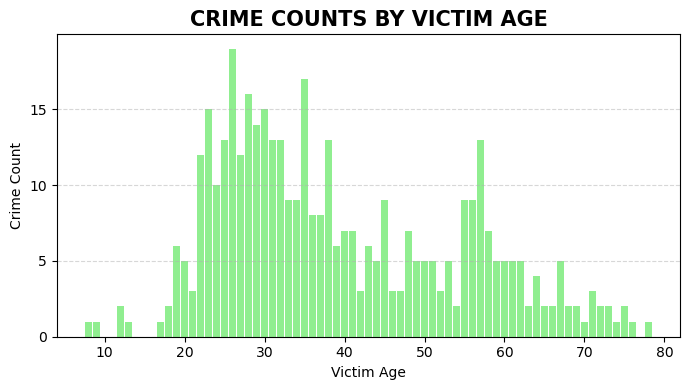

In [113]:
plt.figure(figsize=(7, 4))
plt.bar(victim_ages['Vict_Age'], victim_ages['Crime_Count'], color='lightgreen')

plt.title('CRIME COUNTS BY VICTIM AGE',weight ='bold', size = 15)
plt.xlabel('Victim Age')
plt.ylabel('Crime Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.yticks(range(0, max(victim_ages['Crime_Count']) + 1, 5))

plt.tight_layout()
plt.show()

 ## _DIFFERENCE IN CRIME RATES BETWEEN MALES AND FEMALES_

In [80]:
victim_gender = pd.read_sql_query("SELECT Vict_Sex, COUNT(*) AS Crime_Count FROM crime_data WHERE Vict_Sex IS NOT NULL GROUP BY Vict_Sex ORDER BY Crime_Count DESC",connection)

In [81]:
victim_gender                                      #identified sex a/c to the no. crime counts..

,Vict_Sex,Crime_Count
0,M,257
1,F,149
2,Unidentified,3


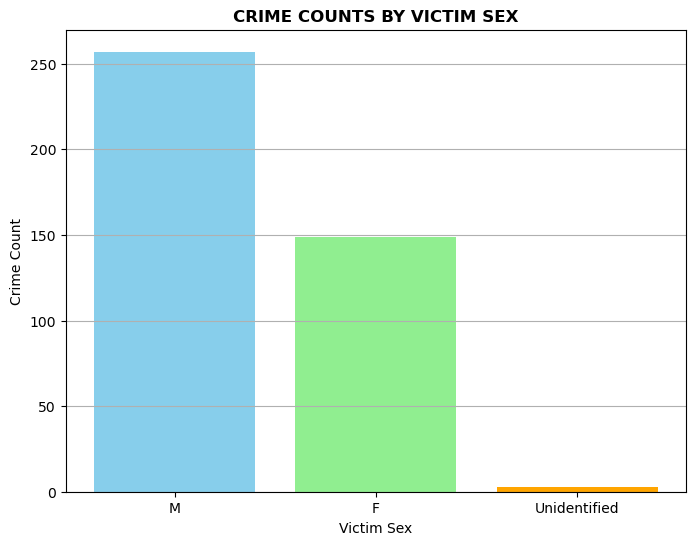

In [120]:
plt.figure(figsize=(8, 6))
plt.bar(victim_gender['Vict_Sex'], victim_gender['Crime_Count'], color=['skyblue', 'lightgreen', 'orange'])

plt.title('CRIME COUNTS BY VICTIM SEX', weight = 'bold')

plt.xlabel('Victim Sex')
plt.ylabel('Crime Count')

plt.grid(axis='y')
plt.show()

# > LOCATION ANALYSIS

##  _MOST CRIMES OCCUR BASED ON "LOCATION" COLUMN_

In [86]:
Crime_Location = pd.read_sql_query("SELECT AREA_NAME, COUNT(*) AS Crime_Count FROM crime_data WHERE AREA_NAME IS NOT NULL GROUP BY AREA_NAME ORDER BY Crime_Count DESC", connection)

In [87]:
Crime_Location                                         #extracted the area name and the num. of crimes...

,AREA_NAME,Crime_Count
0,Central,359
1,West LA,5
2,Northeast,5
3,Harbor,5
4,77th Street,5
5,Van Nuys,4
6,Rampart,4
7,Hollywood,4
8,Southwest,3
9,Wilshire,3


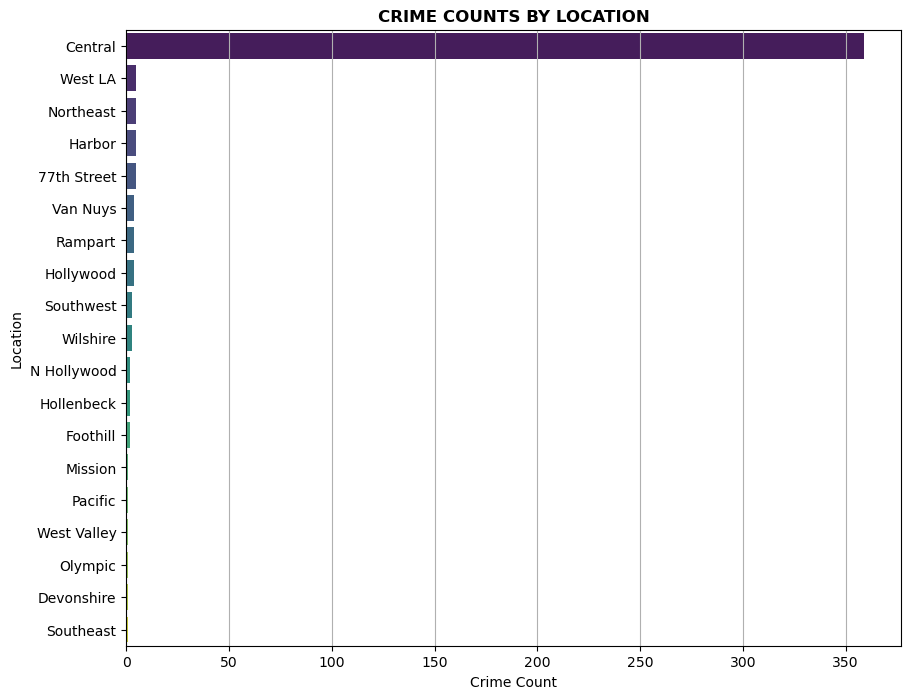

In [114]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Crime_Count', y='AREA_NAME', data=Crime_Location, palette='viridis')

plt.title('CRIME COUNTS BY LOCATION', weight ='bold')
plt.xlabel('Crime Count')
plt.ylabel('Location')
plt.grid(axis='x')
plt.show()

## _DISTRIBUTION OF REPORTED CRIMES BASED ON CRIME CODES_ 

In [92]:
Crime_Codes =  pd.read_sql_query("SELECT Crm_Cd, Crm_Cd_Desc, COUNT(*) AS Crime_Count FROM crime_data WHERE Crm_Cd IS NOT NULL GROUP BY Crm_Cd, Crm_Cd_Desc ORDER BY Crime_Count DESC LIMIT 20", connection)

In [93]:
Crime_Codes                                #here are the codes & descriptions with top 20 crime counts..

,Crm_Cd,Crm_Cd_Desc,Crime_Count
0,330,BURGLARY FROM VEHICLE,77
1,624,BATTERY - SIMPLE ASSAULT,74
2,440,THEFT PLAIN - PETTY ($950 & UNDER),42
3,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",24
4,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23
5,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),21
6,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),17
7,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",17
8,310,BURGLARY,13
9,888,TRESPASSING,11


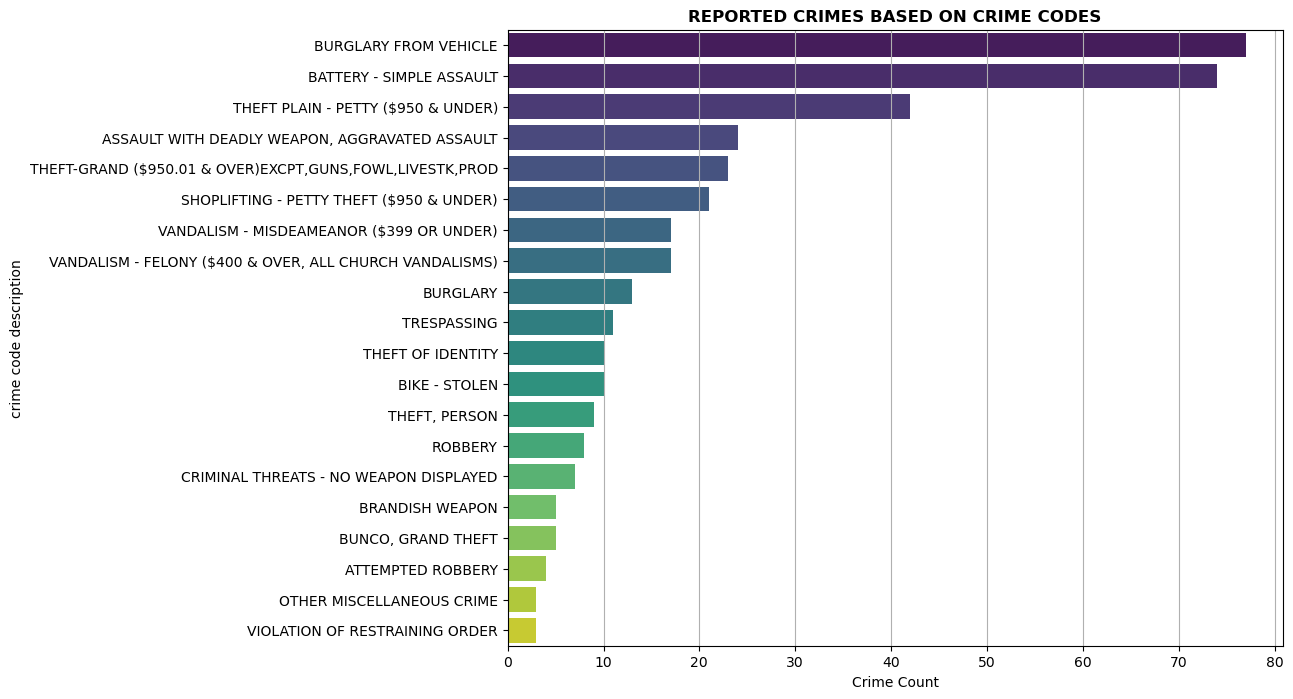

In [109]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Crime_Count', y='Crm_Cd_Desc', data=Crime_Codes, palette='viridis')

plt.title('REPORTED CRIMES BASED ON CRIME CODES', weight ='bold')
plt.xlabel('Crime Count')
plt.ylabel('crime code description')
plt.grid(axis='x')
plt.show()

In [43]:
connection.close()                                          #closing the connection from MySQL db..

# >> CONCLUSION 

### Where are the geographical hotspots for reported crimes?

- Longitude between 34.0 to 34.1 Latitude between -118.20 to -118.30

### What is the distribution of victim ages in reported crimes?

- According to the analysis age between 22 to 38 reported most crimes.  

### Is there a significant difference in crime rates between male and female victims?

- Males are in more number comparing to females.

### Where do most crimes occur based on the "Location" column?

- Location : central (359 crimes reported).

### What is the distribution of reported crimes based on Crime Code?

- Based on the number of crimes :-
    
    - crime code - 624  Desc : (BATTERY - SIMPLE ASSAULT)
    - crime code - 330  Desc : (BURGLARY FROM VEHICLE)
    - crime code - 440  Desc : (THEFT PLAIN - PETTY ($950 & UNDER))